<a href="https://colab.research.google.com/github/hsiuliwang/ai/blob/main/detection_add_hat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
# Download the test image and utils files
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/test.jpg \
    -O test.jpg
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml \
    -O haarcascade_frontalface_default.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_smile.xml \
    -O haarcascade_smile.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_eye.xml \
    -O haarcascade_eye.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py \
    -O common.py

# these imports let you use opencv
import cv2 #opencv itself
import common #some useful opencv functions
import numpy as np # matrix manipulations

#the following are to do with this interactive notebook code
%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

--2021-06-15 07:27:49--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/test.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 240458 (235K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>] 234.82K  --.-KB/s    in 0.05s   

2021-06-15 07:27:49 (4.94 MB/s) - ‘test.jpg’ saved [240458/240458]

--2021-06-15 07:27:49--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awai

In [170]:
import cv2
import sys
import logging as log
import datetime as dt
from time import sleep
import numpy as np
import os
import subprocess

#cascPath = "haarcascade_frontalface_default.xml"  # for face detection

#if not os.path.exists(cascPath):
 #   subprocess.call(['/content/download_filters.sh'])
#else:
 #   print('Filters already exist!')

faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
#faceCascade = cv2.CascadeClassifier(cascPath)
log.basicConfig(filename='webcam.log',level=log.INFO)

video_capture = cv2.VideoCapture(0)
anterior = 0
mst = cv2.imread('moustache.png')
oldhat = cv2.imread('cowboy_hat.png')
dog = cv2.imread('dog_filter.png')
hat = cv2.imread('hat2.png')

def put_moustache(mst,fc,x,y,w,h):
    
    face_width = w
    face_height = h

    mst_width = int(face_width*0.4166666)+1
    mst_height = int(face_height*0.142857)+1



    mst = cv2.resize(mst,(mst_width,mst_height))

    for i in range(int(0.62857142857*face_height),int(0.62857142857*face_height)+mst_height):
        for j in range(int(0.29166666666*face_width),int(0.29166666666*face_width)+mst_width):
            for k in range(3):
                if mst[i-int(0.62857142857*face_height)][j-int(0.29166666666*face_width)][k] <235:
                    fc[y+i][x+j][k] = mst[i-int(0.62857142857*face_height)][j-int(0.29166666666*face_width)][k]
    return fc

def put_hat(hat,fc,x,y,w,h):
    
    face_width = w
    face_height = h
    
    hat_width = face_width+1
    hat_height = int(0.35*face_height)+1
    
    hat = cv2.resize(hat,(hat_width,hat_height))
    
    for i in range(hat_height):
        for j in range(hat_width):
            for k in range(3):
                if hat[i][j][k]<235:
                    fc[y+i-int(0.25*face_height)][x+j][k] = hat[i][j][k]
    return fc

def put_dog_filter(dog,fc,x,y,w,h):
    face_width = w
    face_height = h
    
    dog = cv2.resize(dog,(int(face_width*1.5),int(face_height*1.75)))
    for i in range(int(face_height*1.75)):
        for j in range(int(face_width*1.5)):
            for k in range(3):
                if dog[i][j][k]<235:
                    fc[y+i-int(0.375*h)-1][x+j-int(0.25*w)][k] = dog[i][j][k]
    return fc
    
    
    


In [ ]:

    
ch = 1

#ch = int(raw_input())



    
while True:
    if not video_capture.isOpened():
        print('Unable to load camera.')
        sleep(5)
        pass

    # Capture frame-by-frame
    ret, frame = video_capture.read()
    
    if ret == True:
    


      gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)


      faces = faceCascade.detectMultiScale(
          gray,
          scaleFactor=1.1,
          minNeighbors=5,
          minSize=(40,40)
      )

      # Draw a rectangle around the faces
      for (x, y, w, h) in faces:
          #cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
          #cv2.putText(frame,"Person Detected",(x,y),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
          
          if ch==2:
              frame = put_moustache(mst,frame,x,y,w,h)
          elif ch==1:
              frame = put_hat(hat,frame,x,y,w,h)
          elif ch==3:
              frame = put_moustache(mst,frame,x,y,w,h)
              frame = put_hat(hat,frame,x,y,w,h)
          else:
              frame = put_dog_filter(dog,frame,x,y,w,h)
              
              
              
      if anterior != len(faces):
          anterior = len(faces)
          log.info("faces: "+str(len(faces))+" at "+str(dt.datetime.now()))


      # Display the resulting frame
      cv2.imshow('Video', frame)


      if cv2.waitKey(1) & 0xFF == ord('q'):
          break

    

# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()

In [171]:
import imutils
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

In [172]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [158]:
image_file = take_photo()

<IPython.core.display.Javascript object>

400 300


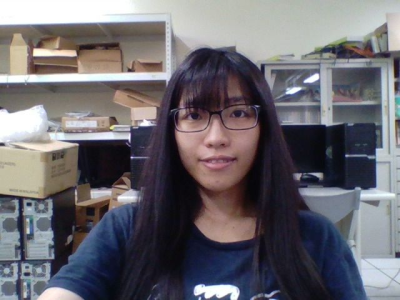

In [173]:
#image = cv2.imread(image_file, cv2.IMREAD_UNCHANGED)
image = cv2.imread(image_file)

# resize it to have a maximum width of 400 pixels
image = imutils.resize(image, width=400)
(h, w) = image.shape[:2]
print(w,h)
cv2_imshow(image)

In [174]:
!wget -N https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
!wget -N https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel

--2021-06-15 07:28:12--  https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28104 (27K) [text/plain]
Saving to: ‘deploy.prototxt’

deploy.prototxt     100%[===================>]  27.45K  --.-KB/s    in 0.003s  

Last-modified header missing -- time-stamps turned off.
2021-06-15 07:28:12 (7.81 MB/s) - ‘deploy.prototxt’ saved [28104/28104]

--2021-06-15 07:28:12--  https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubus

In [175]:
print("[INFO] loading model...")
prototxt = 'deploy.prototxt'
model = 'res10_300x300_ssd_iter_140000.caffemodel'
net = cv2.dnn.readNetFromCaffe(prototxt, model)

[INFO] loading model...


In [176]:
# resize it to have a maximum width of 400 pixels
image = imutils.resize(image, width=400)
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

In [177]:
print("[INFO] computing object detections...")
net.setInput(blob)
detections = net.forward()

[INFO] computing object detections...


In [178]:
for i in range(0, detections.shape[2]):

	# extract the confidence (i.e., probability) associated with the prediction
	confidence = detections[0, 0, i, 2]

	# filter out weak detections by ensuring the `confidence` is
	# greater than the minimum confidence threshold
	if confidence > 0.5:
		# compute the (x, y)-coordinates of the bounding box for the object
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")
		# draw the bounding box of the face along with the associated probability
		text = "{:.2f}%".format(confidence * 100)
		y = startY - 10 if startY - 10 > 10 else startY + 10
		#cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
		#cv2.putText(image, text, (startX, y),
			#cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
#image1 = put_moustache(mst,image,startX,y,100,100)

image1 = put_hat(hat,image,startX-25,startY,150,200)

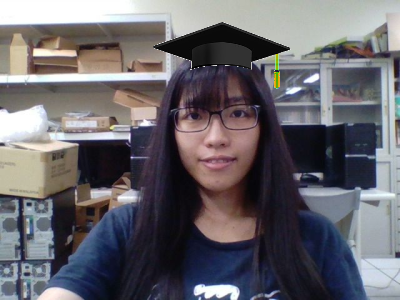

In [179]:
cv2_imshow(image)

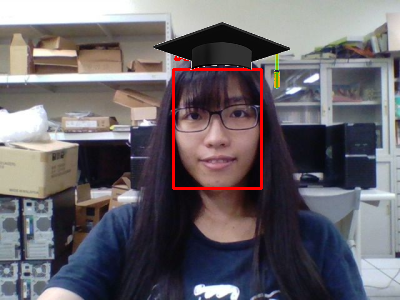

In [168]:

cv2_imshow(image1)